In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
df = pd.read_csv('winemag-data.csv')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JHL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Part 1: By Country

In [85]:
df_desc = df[['description','country']]
# grouped = df_selected.groupby(['Status','Account Category'])
df.dropna(subset=['description'], inplace=True)
df['description'] = df['description'].str.lower()

In [86]:
df['description'] = df['description'].str.replace(',', '')
df['description'] = df['description'].str.replace('.', '')
df['description'] = df['description'].str.replace('(', '')
df['description'] = df['description'].str.replace(')', '')
df['description'] = df['description'].str.replace('/', '')
df['description'] = df['description'].str.replace('%', '')
df['description'] = df['description'].str.replace("'", "")

In [87]:
# remove stopwords
stop = list(line.strip() for line in open('stopwords.txt'))
a = lambda x: ' '.join([item for item in x.split() if item not in stop])
df['description'] = df['description'].apply(a)

In [88]:
# separate dataframes for each category
US_comp = ['US','France', 'Italy', 'Spain', 'Australia', 'South Africa', 'Argentina', 'Chile']

df_us = df[df['country'] == "US"]
df_fr = df[df['country'] == "France"]
df_it = df[df['country'] == "Italy"]
df_sp = df[df['country'] == "Spain"]
df_au = df[df['country'] == "Australia"]
df_sa = df[df['country'] == "South Africa"]
df_ag = df[df['country'] == "Argentina"]
df_ch = df[df['country'] == "Chile"]

In [7]:
# tokenize each dataframe

desc_us = df_us['description'].str.lower().str.cat(sep=' ')
words_us = nltk.tokenize.word_tokenize(desc_us)
word_dist_us = nltk.FreqDist(words_us)

desc_fr = df_fr['description'].str.lower().str.cat(sep=' ')
words_fr = nltk.tokenize.word_tokenize(desc_fr)
word_dist_fr = nltk.FreqDist(words_fr)

desc_it = df_it['description'].str.lower().str.cat(sep=' ')
words_it = nltk.tokenize.word_tokenize(desc_it)
word_dist_it = nltk.FreqDist(words_it)

desc_sp = df_sp['description'].str.lower().str.cat(sep=' ')
words_sp = nltk.tokenize.word_tokenize(desc_sp)
word_dist_sp = nltk.FreqDist(words_sp)

desc_au = df_au['description'].str.lower().str.cat(sep=' ')
words_au = nltk.tokenize.word_tokenize(desc_au)
word_dist_au = nltk.FreqDist(words_au)

desc_sa = df_sa['description'].str.lower().str.cat(sep=' ')
words_sa = nltk.tokenize.word_tokenize(desc_sa)
word_dist_sa = nltk.FreqDist(words_sa)

desc_ag = df_ag['description'].str.lower().str.cat(sep=' ')
words_ag = nltk.tokenize.word_tokenize(desc_ag)
word_dist_ag = nltk.FreqDist(words_ag)

desc_ch = df_ch['description'].str.lower().str.cat(sep=' ')
words_ch = nltk.tokenize.word_tokenize(desc_ch)
word_dist_ch = nltk.FreqDist(words_ch)

In [8]:
top_N = int(input("How many most common words would you like to see? "))
result_us = pd.DataFrame(word_dist_us.most_common(top_N), columns=['Word', 'Frequency'])
result_fr = pd.DataFrame(word_dist_fr.most_common(top_N), columns=['Word', 'Frequency'])
result_it = pd.DataFrame(word_dist_it.most_common(top_N), columns=['Word', 'Frequency'])
result_sp = pd.DataFrame(word_dist_sp.most_common(top_N), columns=['Word', 'Frequency'])
result_au = pd.DataFrame(word_dist_au.most_common(top_N), columns=['Word', 'Frequency'])
result_sa = pd.DataFrame(word_dist_sa.most_common(top_N), columns=['Word', 'Frequency'])
result_ag = pd.DataFrame(word_dist_ag.most_common(top_N), columns=['Word', 'Frequency'])
result_ch = pd.DataFrame(word_dist_ch.most_common(top_N), columns=['Word', 'Frequency'])

How many most common words would you like to see? 10


In [9]:
result_us['Country'] = 'US'
result_fr['Country'] = 'France'
result_it['Country'] = 'Italy'
result_sp['Country'] = 'Spain'
result_au['Country'] = 'Australia'
result_sa['Country'] = 'South Africa'
result_ag['Country'] = 'Argentina'
result_ch['Country'] = 'Chile'

In [10]:
frames = [result_us, result_fr, result_it, result_sp, result_au, result_sa, result_ag, result_ch]
df_concat = pd.concat(frames, ignore_index=True)
df_concat

,Word,Frequency,Country
0,cherry,12944,US
1,aromas,11247,US
2,tannins,10826,US
3,black,10757,US
4,oak,10041,US
5,dry,8121,US
6,ripe,8037,US
7,rich,7256,US
8,red,7133,US
9,cabernet,6863,US


In [11]:
def get_frequency(word=''):
    a = df_concat[df_concat['Word'] == word]
    a = a.sum(numeric_only=True)
    a = a.iat[0]
    return a

In [12]:
dfSum = df_concat.groupby(['Word']).sum()
dfSum.sort_values('Frequency', ascending=False)

,Frequency
Word,
aromas,36147
tannins,25388
cherry,23857
ripe,20514
black,19013
red,14963
oak,13483
rich,12442
dry,11444


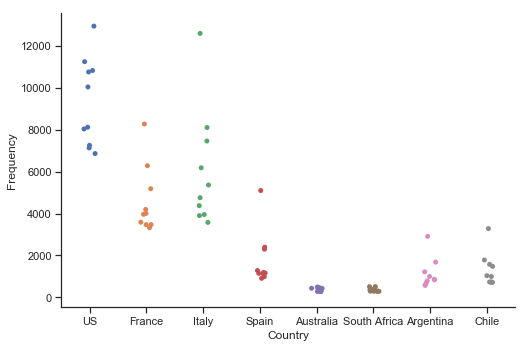

In [83]:
# Volume by country
sns.catplot(x="Country", y="Frequency", data=df_concat, height=5, aspect=1.5)

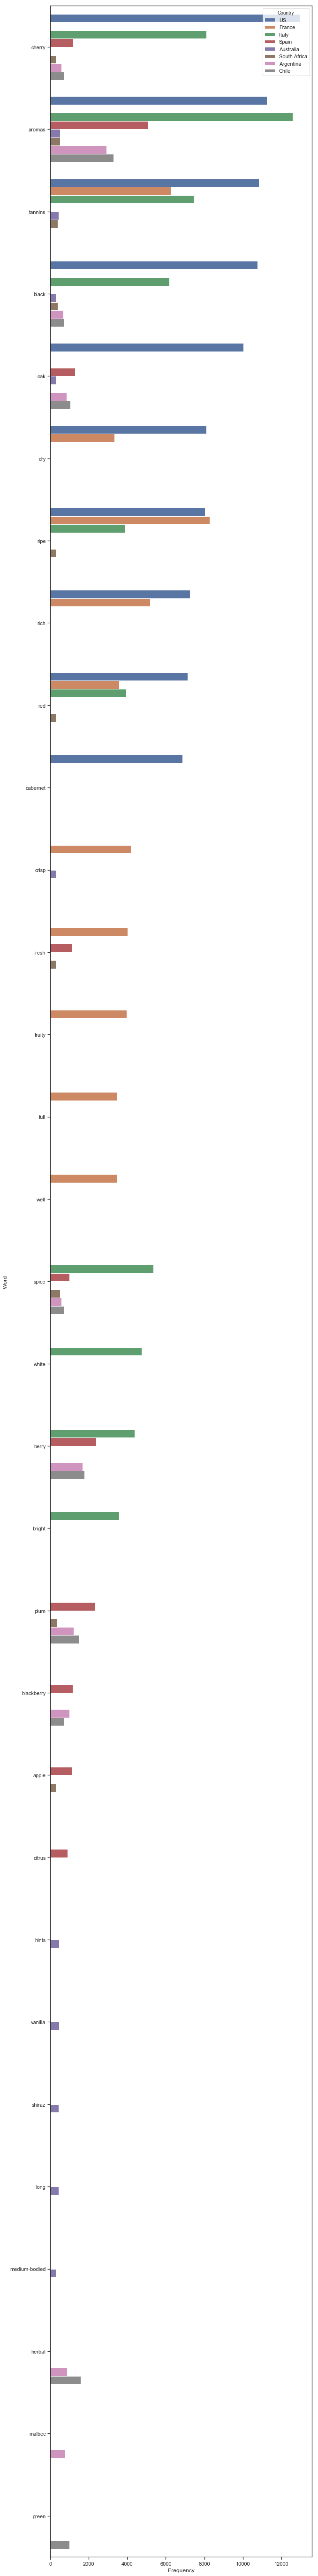

In [77]:
plt.figure(figsize=(10, 100))
sns.barplot(y="Word", x="Frequency", hue="Country", data=df_concat)

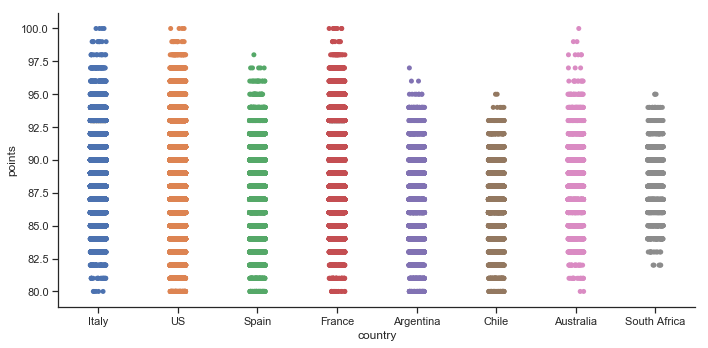

In [78]:
#sns.set(style="ticks", color_codes=True)
df_UScomp = df[df.country.isin(US_comp)]
sns.catplot(x="country", y="points", data=df_UScomp, height=5, aspect=2)

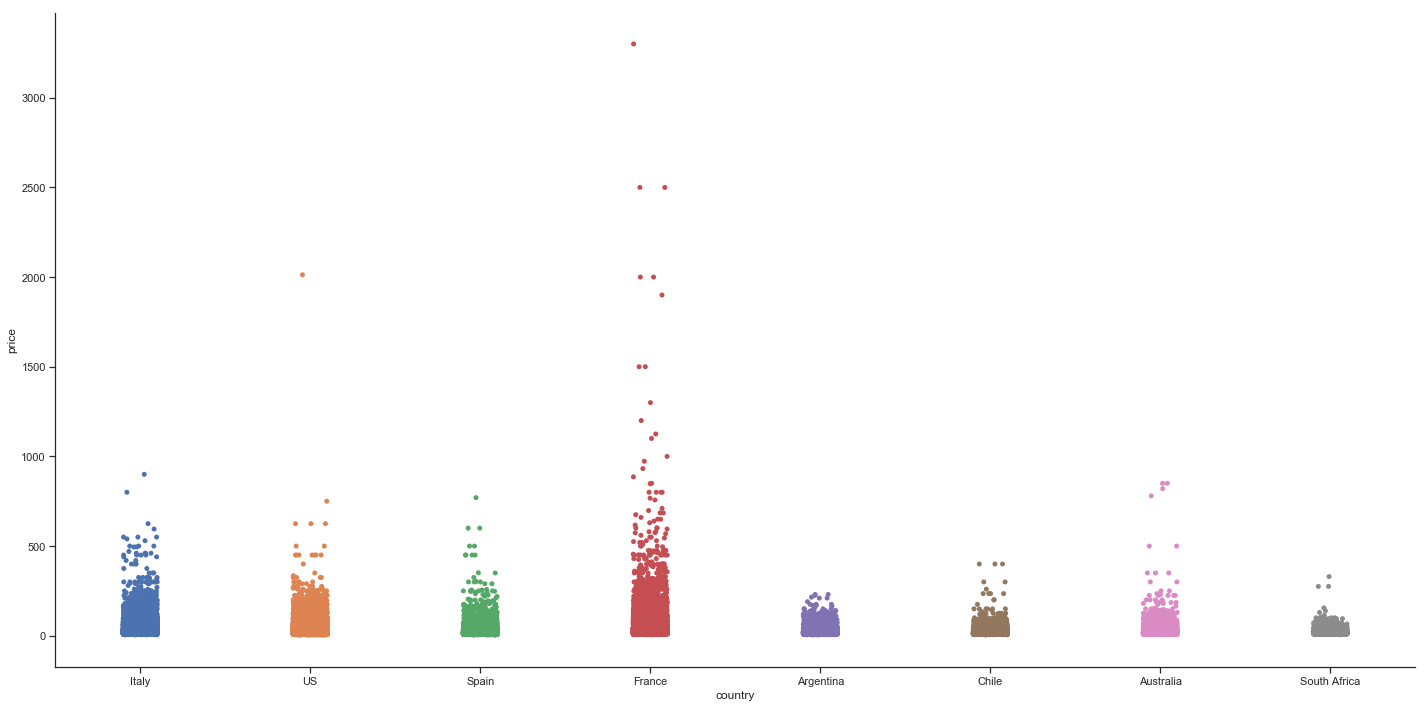

In [79]:
sns.catplot(x="country", y="price", data=df_UScomp, height=10, aspect=2)

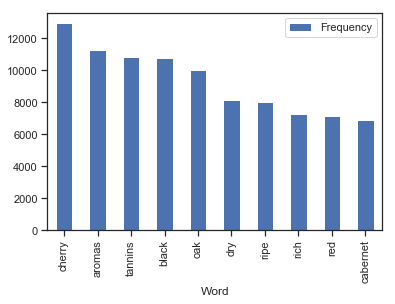

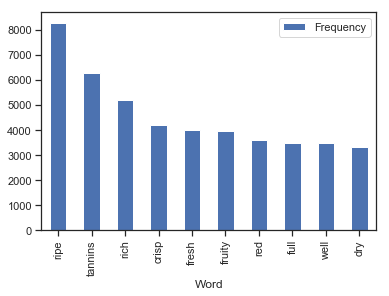

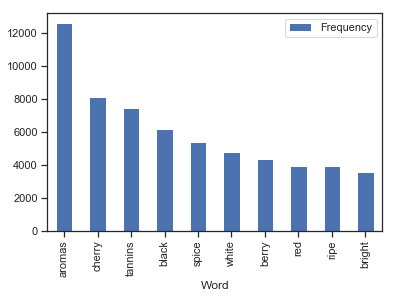

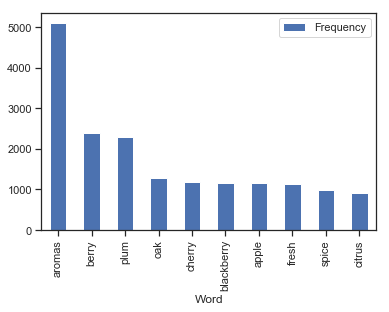

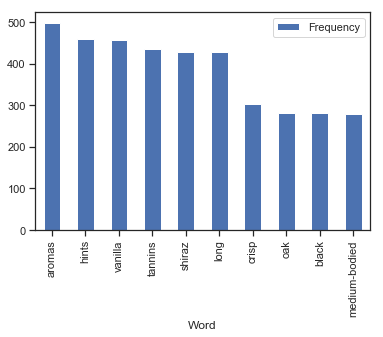

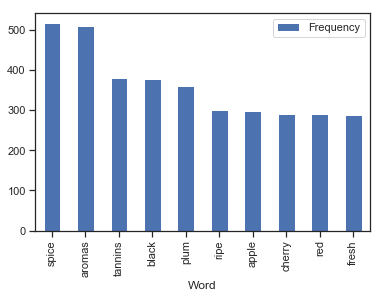

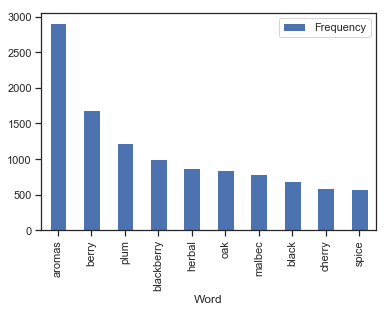

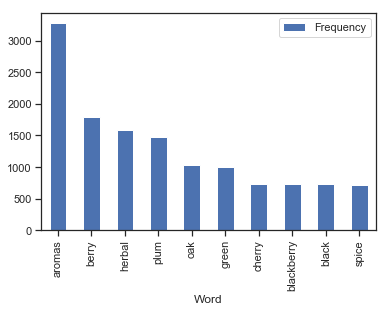

In [80]:
result_us.plot.bar(x='Word',y='Frequency')
result_fr.plot.bar(x='Word',y='Frequency')
result_it.plot.bar(x='Word',y='Frequency')
result_sp.plot.bar(x='Word',y='Frequency')
result_au.plot.bar(x='Word',y='Frequency')
result_sa.plot.bar(x='Word',y='Frequency')
result_ag.plot.bar(x='Word',y='Frequency')
result_ch.plot.bar(x='Word',y='Frequency')

In [ ]:
df_keys.to_csv('title_by_ac.csv', sep=',', encoding='utf-8')

In [82]:
df2 = df.dropna(subset=['price'])
df2 = df2[['points','price', 'province', 'region_1', 'variety', 'winery']]
df2 = df2[df2['province'] == 'Virginia']

bins = [0, 84, 89, np.inf]
names = ['80-84', '85-89', '90+']

df2['points_range'] = pd.cut(df2['points'], bins, labels=names)

df2

,points,price,province,region_1,variety,winery,points_range
19,87,32.0,Virginia,Virginia,Meritage,Quiévremont,85-89
20,87,23.0,Virginia,Virginia,Red Blend,Quiévremont,85-89
45,86,40.0,Virginia,Virginia,Red Blend,Tarara,85-89
48,86,16.0,Virginia,Monticello,Sauvignon Blanc,Trump,85-89
249,85,18.0,Virginia,Monticello,Bordeaux-style Red Blend,Autumn Hill,85-89
1625,85,16.0,Virginia,Virginia,White Blend,The Williamsburg Winery,85-89
1631,85,22.0,Virginia,Middleburg,Muskat Ottonel,Blue Valley,85-89
1959,88,35.0,Virginia,Virginia,White Blend,Tarara,85-89
1982,88,22.0,Virginia,Virginia,Chardonnay,Potomac Point,85-89
1994,84,18.0,Virginia,Virginia's Eastern Shore,Chardonnay,Chatham,80-84


In [45]:
df2.groupby('region_1').mean()

,points,price
region_1,,
Middleburg,85.642857,27.964286
Monticello,86.359477,25.790850
Shenandoah Valley,85.218750,22.750000
Virginia,85.440217,27.625000
Virginia's Eastern Shore,85.200000,18.800000


In [46]:
df2.groupby('region_1').std()

,points,price
region_1,,
Middleburg,1.768328,5.371269
Monticello,2.044294,8.538345
Shenandoah Valley,1.736410,6.681703
Virginia,2.104367,10.861392
Virginia's Eastern Shore,1.095445,1.303840


In [47]:
df2.groupby('region_1').median()

,points,price
region_1,,
Middleburg,86,28.0
Monticello,87,24.0
Shenandoah Valley,86,20.5
Virginia,85,25.0
Virginia's Eastern Shore,85,19.0


In [48]:
df2.groupby('region_1').max()

,points,price,province,variety,winery,points_range
region_1,,,,,,
Middleburg,89,40.0,Virginia,Viognier,Three Fox,85-89
Monticello,92,58.0,Virginia,Viognier,White Hall,90+
Shenandoah Valley,89,40.0,Virginia,White Blend,Veramar,85-89
Virginia,92,100.0,Virginia,White Blend,Zephaniah,90+
Virginia's Eastern Shore,87,20.0,Virginia,Chardonnay,Chatham,85-89


In [49]:
# Figure out which regions have the most wines with a score of 90+.
df2.groupby(['region_1', 'points_range']).count()

points  price  province  variety  \
region_1                 points_range                                     
Middleburg               80-84            6.0    6.0       6.0      6.0   
                         85-89           22.0   22.0      22.0     22.0   
                         90+              NaN    NaN       NaN      NaN   
Monticello               80-84           28.0   28.0      28.0     28.0   
                         85-89          118.0  118.0     118.0    118.0   
                         90+              7.0    7.0       7.0      7.0   
Shenandoah Valley        80-84           11.0   11.0      11.0     11.0   
                         85-89           21.0   21.0      21.0     21.0   
                         90+              NaN    NaN       NaN      NaN   
Virginia                 80-84          186.0  186.0     186.0    186.0   
                         85-89          348.0  348.0     348.0    348.0   
                         90+             18.0   18.0      18.0     18.0   
Virginia's Eastern Shore 80-84            1.0    1.0       1.0      1.0   
                         85-89            4.0    4.0       4.0      4.0   
                         90+              NaN    NaN       NaN      NaN   

                                       winery  
region_1                 points_range          
Middleburg               80-84            6.0  
                         85-89           22.0  
                         90+              NaN  
Monticello               80-84           28.0  
                         85-89          118.0  
                         90+              7.0  
Shenandoah Valley        80-84           11.0  
                         85-89           21.0  
                         90+              NaN  
Virginia                 80-84          186.0  
                         85-89          348.0  
                         90+             18.0  
Virginia's Eastern Shore 80-84            1.0  
                         85-89            4.0  
                         90+              NaN

In [50]:
# Find the lowest priced wine per region per points range.
df2.groupby(['region_1', 'points_range']).min()

points  price  province  \
region_1                 points_range                            
Middleburg               80-84           81.0   24.0  Virginia   
                         85-89           85.0   18.0  Virginia   
                         90+              NaN    NaN       NaN   
Monticello               80-84           81.0   14.0  Virginia   
                         85-89           85.0   14.0  Virginia   
                         90+             90.0   20.0  Virginia   
Shenandoah Valley        80-84           81.0   15.0  Virginia   
                         85-89           85.0   14.0  Virginia   
                         90+              NaN    NaN       NaN   
Virginia                 80-84           80.0   10.0  Virginia   
                         85-89           85.0   11.0  Virginia   
                         90+             90.0   23.0  Virginia   
Virginia's Eastern Shore 80-84           84.0   18.0  Virginia   
                         85-89           85.0   17.0  Virginia   
                         90+              NaN    NaN       NaN   

                                                        variety  \
region_1                 points_range                             
Middleburg               80-84                        Carmenère   
                         85-89         Bordeaux-style Red Blend   
                         90+                                NaN   
Monticello               80-84         Bordeaux-style Red Blend   
                         85-89         Bordeaux-style Red Blend   
                         90+                           Meritage   
Shenandoah Valley        80-84                   Cabernet Franc   
                         85-89         Bordeaux-style Red Blend   
                         90+                                NaN   
Virginia                 80-84         Bordeaux-style Red Blend   
                         85-89                         Albariño   
                         90+           Bordeaux-style Red Blend   
Virginia's Eastern Shore 80-84                       Chardonnay   
                         85-89         Bordeaux-style Red Blend   
                         90+                                NaN   

                                                        winery  
region_1                 points_range                           
Middleburg               80-84                         Casanel  
                         85-89                     Blue Valley  
                         90+                               NaN  
Monticello               80-84                       Albemarle  
                         85-89                       Albemarle  
                         90+                       King Family  
Shenandoah Valley        80-84                    Barren Ridge  
                         85-89                    Barren Ridge  
                         90+                               NaN  
Virginia                 80-84                      868 Estate  
                         85-89                  8 Chains North  
                         90+           Barboursville Vineyards  
Virginia's Eastern Shore 80-84                         Chatham  
                         85-89                         Chatham  
                         90+                               NaN

In [51]:
# Find average price and their standard deviations per region per points range
grouped = df2.groupby(['region_1', 'points_range'])
grouped_price = grouped['price']
grouped_price.agg(['mean', 'std'])

mean        std
region_1                 points_range                      
Middleburg               80-84         29.500000   5.576737
                         85-89         27.545455   5.369466
Monticello               80-84         21.321429   6.949839
                         85-89         26.381356   8.298820
                         90+           33.714286  10.641339
Shenandoah Valley        80-84         19.363636   2.873072
                         85-89         24.523810   7.447275
Virginia                 80-84         24.526882   8.280999
                         85-89         28.169540   9.920868
                         90+           49.111111  21.643879
Virginia's Eastern Shore 80-84         18.000000        NaN
                         85-89         19.000000   1.414214

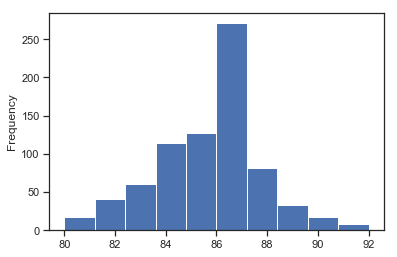

In [52]:
df2['points'].plot.hist()

# Part 2: By Quality

In [102]:
df = pd.read_csv('winemag-data.csv')
df = df.dropna(subset=['price'])
df.dropna(subset=['description'], inplace=True)
df['description'] = df['description'].str.lower()

df = df[['points','price', 'country', 'province', 'region_1', 'variety', 'winery', 'description']]

bins = [0, 84, 89, np.inf]
names = ['80-84', '85-89', '90+']

df['points_range'] = pd.cut(df['points'], bins, labels=names)

In [103]:
# remove punctuations
df['description'] = df['description'].str.replace(',', '')
df['description'] = df['description'].str.replace('.', '')
df['description'] = df['description'].str.replace('(', '')
df['description'] = df['description'].str.replace(')', '')
df['description'] = df['description'].str.replace('/', '')
df['description'] = df['description'].str.replace('%', '')
df['description'] = df['description'].str.replace("'", "")

# remove stopwords
stop = list(line.strip() for line in open('stopwords.txt'))
a = lambda x: ' '.join([item for item in x.split() if item not in stop])
df['description'] = df['description'].apply(a)

In [104]:
dfGood = df[df['points_range'] == '80-84']
dfBetter = df[df['points_range'] == '85-89']
dfBest = df[df['points_range'] == '90+']

In [43]:
# 1
df = dfGood

In [105]:
# 2
df = dfBetter

In [19]:
# 3
df = dfBest

In [106]:
df_us = df[df['country'] == "US"]
df_fr = df[df['country'] == "France"]
df_it = df[df['country'] == "Italy"]
df_sp = df[df['country'] == "Spain"]
df_au = df[df['country'] == "Australia"]
df_sa = df[df['country'] == "South Africa"]
df_ag = df[df['country'] == "Argentina"]
df_ch = df[df['country'] == "Chile"]

In [107]:
# tokenize each dataframe

desc_us = df_fr['description'].str.lower().str.cat(sep=' ')
words_us = nltk.tokenize.word_tokenize(desc_us)
word_dist_us = nltk.FreqDist(words_us)

desc_fr = df_fr['description'].str.lower().str.cat(sep=' ')
words_fr = nltk.tokenize.word_tokenize(desc_fr)
word_dist_fr = nltk.FreqDist(words_fr)

desc_it = df_it['description'].str.lower().str.cat(sep=' ')
words_it = nltk.tokenize.word_tokenize(desc_it)
word_dist_it = nltk.FreqDist(words_it)

desc_sp = df_sp['description'].str.lower().str.cat(sep=' ')
words_sp = nltk.tokenize.word_tokenize(desc_sp)
word_dist_sp = nltk.FreqDist(words_sp)

desc_au = df_au['description'].str.lower().str.cat(sep=' ')
words_au = nltk.tokenize.word_tokenize(desc_au)
word_dist_au = nltk.FreqDist(words_au)

desc_sa = df_sa['description'].str.lower().str.cat(sep=' ')
words_sa = nltk.tokenize.word_tokenize(desc_sa)
word_dist_sa = nltk.FreqDist(words_sa)

desc_ag = df_ag['description'].str.lower().str.cat(sep=' ')
words_ag = nltk.tokenize.word_tokenize(desc_ag)
word_dist_ag = nltk.FreqDist(words_ag)

desc_ch = df_ch['description'].str.lower().str.cat(sep=' ')
words_ch = nltk.tokenize.word_tokenize(desc_ch)
word_dist_ch = nltk.FreqDist(words_ch)

In [108]:
top_N = int(input("How many most common words would you like to see? "))
result_us = pd.DataFrame(word_dist_us.most_common(top_N), columns=['Word', 'Frequency'])
result_fr = pd.DataFrame(word_dist_fr.most_common(top_N), columns=['Word', 'Frequency'])
result_it = pd.DataFrame(word_dist_it.most_common(top_N), columns=['Word', 'Frequency'])
result_sp = pd.DataFrame(word_dist_sp.most_common(top_N), columns=['Word', 'Frequency'])
result_au = pd.DataFrame(word_dist_au.most_common(top_N), columns=['Word', 'Frequency'])
result_sa = pd.DataFrame(word_dist_sa.most_common(top_N), columns=['Word', 'Frequency'])
result_ag = pd.DataFrame(word_dist_ag.most_common(top_N), columns=['Word', 'Frequency'])
result_ch = pd.DataFrame(word_dist_ch.most_common(top_N), columns=['Word', 'Frequency'])

How many most common words would you like to see? 10


In [109]:
result_us['Country'] = 'US'
result_fr['Country'] = 'France'
result_it['Country'] = 'Italy'
result_sp['Country'] = 'Spain'
result_au['Country'] = 'Australia'
result_sa['Country'] = 'South Africa'
result_ag['Country'] = 'Argentina'
result_ch['Country'] = 'Chile'

In [110]:
frames = [result_us, result_fr, result_it, result_sp, result_au, result_sa, result_ag, result_ch]
df_concat = pd.concat(frames, ignore_index=True)

In [49]:
dfGood_concat = df_concat

In [111]:
dfBetter_concat = df_concat

In [25]:
dfBest_concat = df_concat

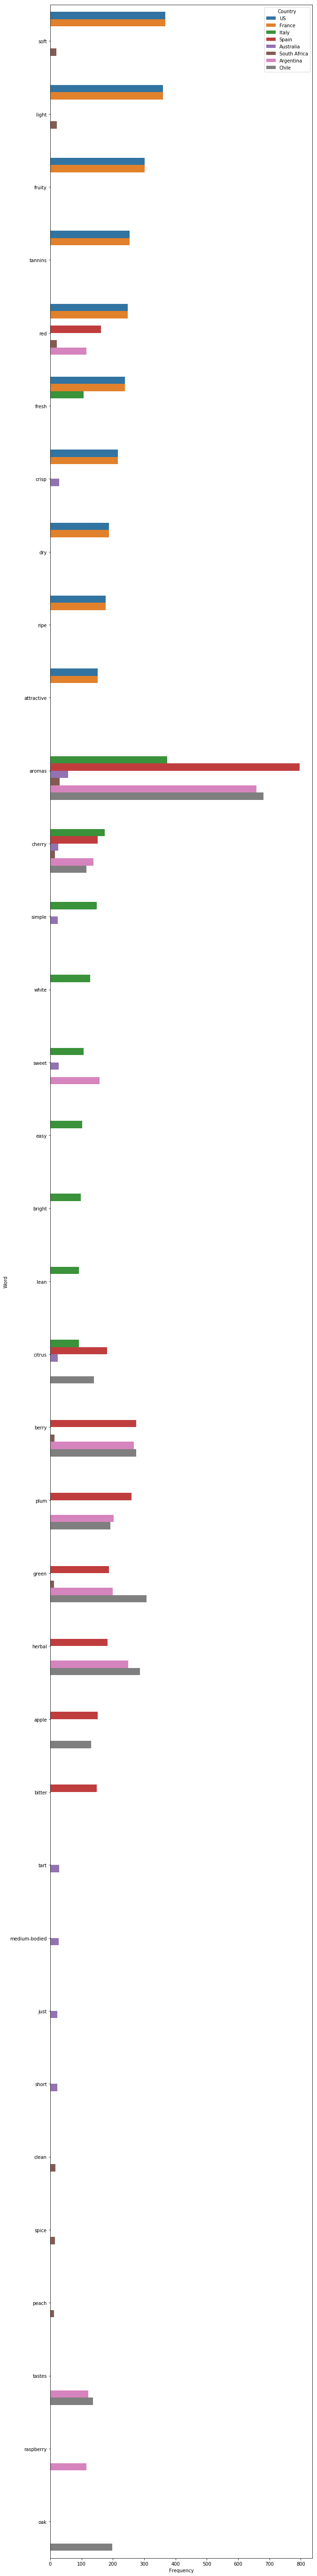

In [25]:
# dfGood (80-85)
plt.figure(figsize=(10, 100))
sns.barplot(y="Word", x="Frequency", hue="Country", data=df_concat)

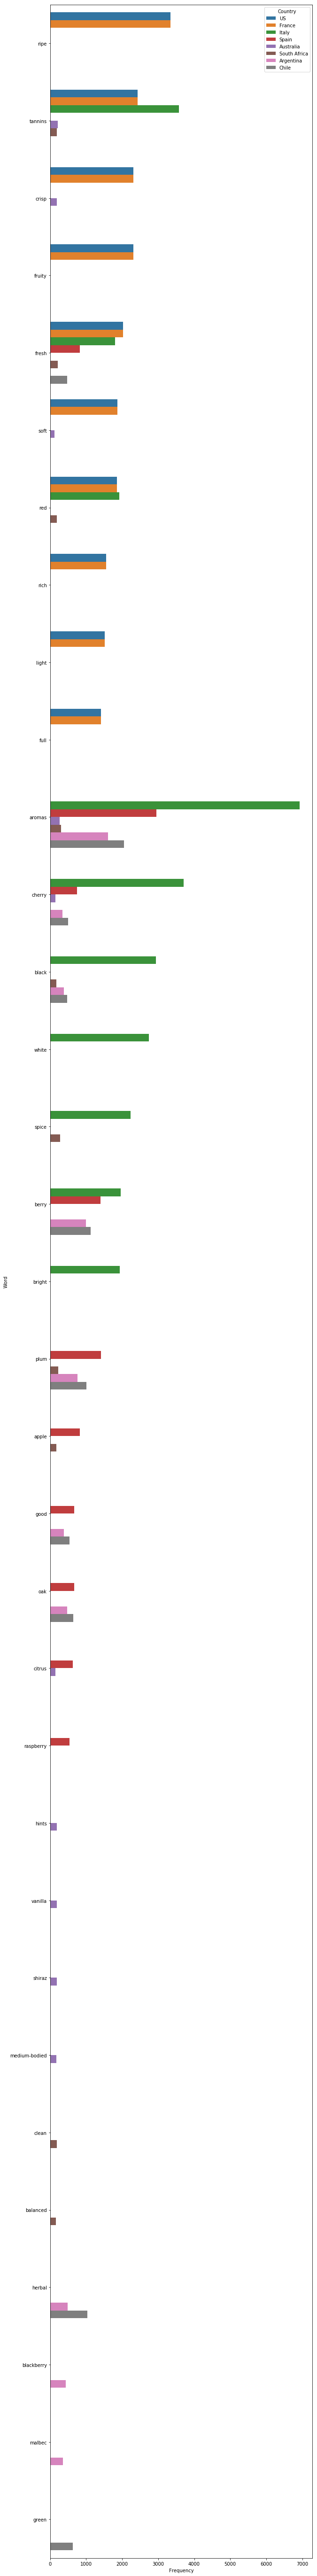

In [18]:
# dfBetter (86-90)
plt.figure(figsize=(10, 100))
sns.barplot(y="Word", x="Frequency", hue="Country", data=df_concat)

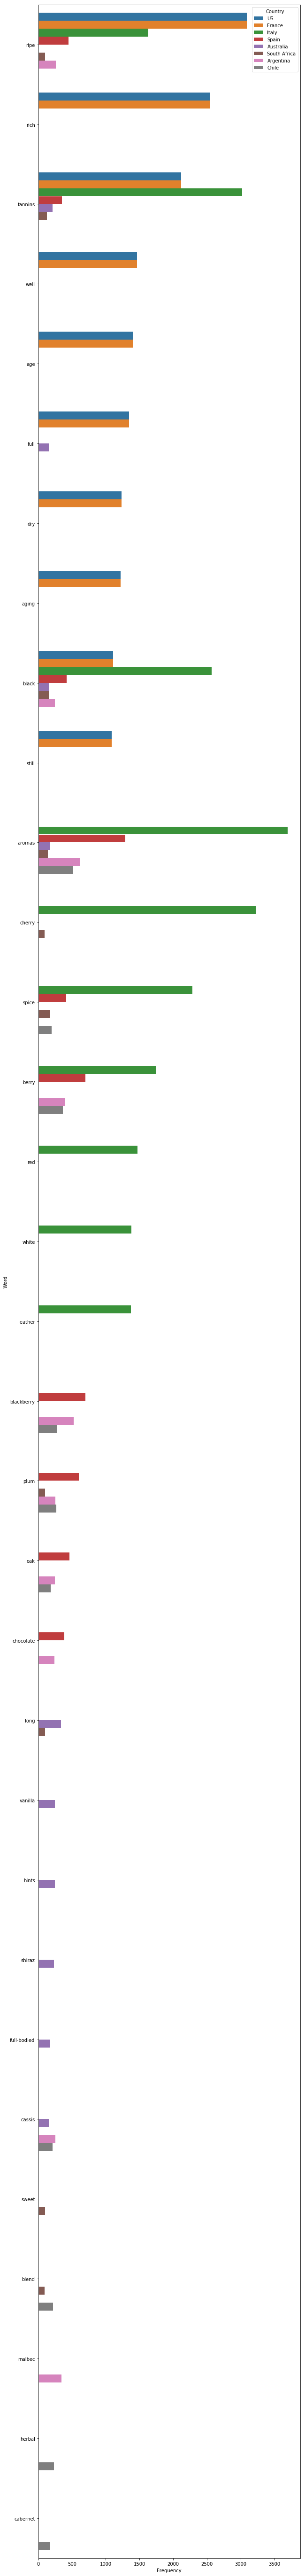

In [73]:
# dfBest (90+)
plt.figure(figsize=(10, 100))
x = sns.barplot(y="Word", x="Frequency", hue="Country", data=df_concat)

In [52]:
# dfGood (80-85)
dfGoodSum = dfGood_concat.groupby(['Word']).sum()
dfGoodSum.sort_values('Frequency', ascending=False)

,Frequency
Word,
aromas,2598
berry,829
red,793
soft,756
light,741
herbal,718
green,706
plum,655
cherry,619


In [60]:
# dfBetter (86-90)
dfBetterSum = dfBetter_concat.groupby(['Word']).sum()
dfBetterSum.sort_values('Frequency', ascending=False)

,Frequency
Word,
aromas,14090
tannins,8826
fresh,7347
ripe,6690
red,5828
berry,5481
cherry,5436
crisp,4798
fruity,4612


In [26]:
# dfBest (90+)
dfBestSum = dfBest_concat.groupby(['Word']).sum()
dfBestSum.sort_values('Frequency', ascending=False)

,Frequency
Word,
ripe,8626
tannins,7955
aromas,6442
black,5762
rich,5082
cherry,3316
berry,3209
spice,3074
well,2922


In [136]:
def get_frequency(group='',word=''):
    try:
        if group == 'Good':
            group = dfGood_concat
        elif group == 'Better':
            group = dfBetter_concat
        elif group == 'Best':
            group = dfBest_concat
        a = group[group['Word'] == word]
        a = a.sum(numeric_only=True)
        a = a.iat[0]
        return a
    except Exception:
        print("Please check your input.")

In [141]:
def get_average(group='',word=''):
    try:
        if group == 'Good':
            group = dfGood_concat
        elif group == 'Better':
            group = dfBetter_concat
        elif group == 'Best':
            group = dfBest_concat
        a = group[group['Word'] == 'ripe']
        a = a.mean(numeric_only=True)
        a = round(a.iat[0], 2)    
        return a
    except Exception:
        print("Please check your input.")

# Top 5 Words From Each Category

## Good
1. aromas
2. berry
3. red
4. soft
5. light

## Better
1. aromas
2. tannins
3. fresh
4. ripe
5. red

## Best
1. ripe
2. tannins
3. aromas
4. black
5. rich

# Summary

## Overall Word Frequency
The relatively low-points group had words "soft" and "light" in the top 5 frequencies.
As we move toward Better and Best group the words "tannins" and "ripe" were newly introduced in the top 5.
The high-points group had "ripe" as the most frequent word, and had "black" as the only color word compared to "red" in Good and Better group.
It is also interesting to note Good wines had "soft" and "light" while the Best wines had "rich" to describe wines.
Lastly, "aromas" appeared all three times - suggesting that it is one of the most important features in describing/grading wines.

## Most Common Words Among Selected Countries
Descriptive words used in at least 5 countries:
#### Good 
Red
Aromas
Cherry

#### Better
Tannins
Fresh
Aromas
Cherry

#### Best
Ripe
Tannins
Black
Aromas

These common words are aligned with the above glance at the overall word frequency.

# Part 3: Unit Tests

In [142]:
import unittest

class WordsTestCase(unittest.TestCase):
    def test_get_frequency(self):
        freq1=get_frequency('Best','ripe')
        freq2=get_frequency('Best','aromas')
        
        self.assertEqual(freq1, 8626)
        self.assertEqual(freq2, 6442)
        
    def test_get_average(self):
        avg1=get_average('Best','ripe')
        avg2=get_average('Better','aromas')
        
        self.assertEqual(avg1, 1437.67)
        self.assertEqual(avg2, 3345)

In [143]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.008s

OK
